# Test our trained model

Load the trained model and look at how well it performs

In [48]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from model.model import cnn
from data import generators 

image_size = (78, 227, 3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Start by loading the pre-trained model weights

In [6]:
saved_model = '../logs/weights-2018-11-02-11-00-18.hdf5'
model = cnn(input_shape=image_size)
model.load_weights(saved_model)

cnn(): Creating CNN with parameters:

input_shape=(78, 227, 3)
kernel_size=(3, 3)
pool_size=(2, 2)
dropout=0.5
activation=elu
optimizer=<keras.optimizers.Adam object at 0x7fbaccc65f28>
loss=mean_squared_error


* Prepare our test data

This is the same approach we used to create train and validation data sets previously

In [16]:
columns = ['image_name', 'angle', 'date', 'time']
df = pd.read_csv('../data/data.txt', names=columns, delimiter=' ')

sample_idx = {}
num_samples = len(df)
sample_idx['train'] = [i for i in range(0, num_samples, 2)]
sample_idx['valid'] = [i for i in range(1, num_samples, 4)]
sample_idx['test'] = [i for i in range(3, num_samples, 4)]

* Create a generator for test data

In [8]:
test_generator = generators.DataGenerator(df.loc[sample_idx['test']],
                                           data_dir='../data/data',
                                           image_size=image_size,
                                           label='Test')

In [10]:
predicted_angles = pd.DataFrame(model.predict_generator(test_generator, verbose=1)

498/498 [==============================] - 141s 283ms/step


* Created a dataframe with predicted and actual steering angles

In [54]:
df_predict = pd.DataFrame(predicted_angles, columns=['predicted'])
df_predict['actual'] = df.loc[sample_idx['test']]['angle']  \
        .values[:len(df_predict['predicted'])] * scipy.pi / 180
df_predict['diff'] = df_predict['predicted'] - df_predict['actual']

* Graph the results

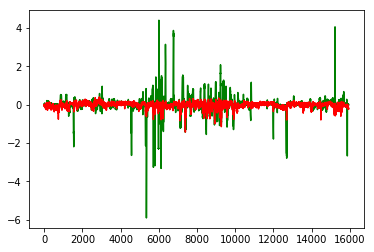

In [52]:
plt.plot(df_predict['actual'], color='green')
plt.plot(df_predict['predicted'], color='red')
plt.show()

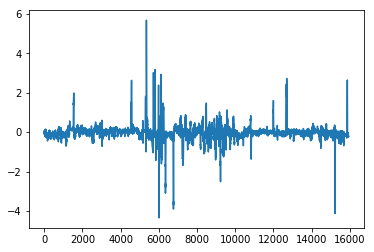

In [55]:
plt.plot(df_predict['diff'])
plt.show()